In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/AIDS_Classification_15000.csv'
data = pd.read_csv(file_path)

# Step 1: Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column before cleaning:\n", missing_values)

# Step 2: Remove duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows before removing: {duplicate_rows}")

# Remove duplicate rows
data = data.drop_duplicates()

# Verify removal
duplicate_rows_after = data.duplicated().sum()
print(f"Number of duplicate rows after removing: {duplicate_rows_after}")

# Step 3: Handle outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
    return outliers

outlier_counts = {column: detect_outliers_iqr(data, column) for column in ['age', 'wtkg', 'cd40', 'cd420', 'cd80', 'cd820']}
print("Outlier counts before handling:\n", outlier_counts)

# Handle outliers (e.g., by capping)
for column in ['age', 'wtkg', 'cd40', 'cd420', 'cd80', 'cd820']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower_bound, upper_bound)

# Verify outliers removal
outlier_counts_after = {column: detect_outliers_iqr(data, column) for column in ['age', 'wtkg', 'cd40', 'cd420', 'cd80', 'cd820']}
print("Outlier counts after handling:\n", outlier_counts_after)

# Step 4: Standardize numerical columns
scaler = StandardScaler()
numerical_columns = ['age', 'wtkg', 'cd40', 'cd420', 'cd80', 'cd820']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display first few rows to verify changes
print("Data after standardization:\n", data.head())

# Step 5: Encode categorical variables
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display first few rows to verify changes
print("Data after encoding categorical variables:\n", data.head())

# Step 6: Verify final dataset
missing_values_after = data.isnull().sum().sum()
duplicate_rows_final = data.duplicated().sum()

print(f"Missing values in the final dataset: {missing_values_after}")
print(f"Duplicate rows in the final dataset: {duplicate_rows_final}")
print("Final dataset preview:\n", data.head())


Missing values in each column before cleaning:
 time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64
Number of duplicate rows before removing: 0
Number of duplicate rows after removing: 0
Outlier counts before handling:
 {'age': 113, 'wtkg': 689, 'cd40': 59, 'cd420': 128, 'cd80': 767, 'cd820': 307}
Outlier counts after handling:
 {'age': 0, 'wtkg': 0, 'cd40': 0, 'cd420': 0, 'cd80': 0, 'cd820': 0}
Data after standardization:
    time  trt       age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0  1108    1  0.393706  1.166337     0     1      1     100       0    1  ...   
1  1079    0  1.252369 -0.814378     0     0      0     100       0    1  ...   
2   492    1 -0.035625  0.684089     0     0  

#Exploratory Data Analysis

## Correlation Matrix

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots are displayed within the notebook
%matplotlib inline

# Set the style for seaborn
sns.set(style="white")

In [4]:
# Assuming 'data' is your DataFrame

# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

print(f"Total numerical features: {len(numerical_columns)}")
print("Numerical Features:")
for col in numerical_columns:
    print(f"- {col}")

Total numerical features: 23
Numerical Features:
- time
- trt
- age
- wtkg
- hemo
- homo
- drugs
- karnof
- oprior
- z30
- preanti
- race
- gender
- str2
- strat
- symptom
- treat
- offtrt
- cd40
- cd420
- cd80
- cd820
- infected


In [5]:
# Compute the correlation matrix
corr_matrix = data[numerical_columns].corr()

# Display the correlation matrix
corr_matrix

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
time,1.000000,0.039492,0.012601,0.040274,0.006382,0.055460,-0.006471,0.009321,-0.011907,-0.086189,...,-0.075730,-0.074715,-0.021565,0.068178,-0.102158,0.044463,0.089595,0.020369,0.015019,-0.107703
trt,0.039492,1.000000,0.045049,0.010307,-0.006965,0.079557,-0.003266,-0.043901,-0.002042,0.021736,...,0.014651,0.020654,-0.020053,0.231786,-0.031007,0.016976,0.024558,0.003140,0.015719,-0.039263
age,0.012601,0.045049,1.000000,0.021072,-0.008483,0.095501,0.001044,-0.049253,0.014647,0.131153,...,0.130171,0.128655,0.001370,0.045762,-0.055300,-0.056826,-0.082230,0.010190,0.000497,0.038293
wtkg,0.040274,0.010307,0.021072,1.000000,-0.035909,0.096740,-0.017544,0.021839,0.013625,-0.083977,...,-0.090902,-0.074466,-0.004441,0.000218,-0.037401,0.034398,0.054226,0.013611,-0.006036,-0.041342
hemo,0.006382,-0.006965,-0.008483,-0.035909,1.000000,-0.066283,0.008648,0.005295,0.006276,0.060974,...,0.062902,0.059761,-0.009641,0.002173,0.020327,-0.041412,-0.025086,-0.018015,-0.019732,0.031820
homo,0.055460,0.079557,0.095501,0.096740,-0.066283,1.000000,-0.057841,-0.011830,0.016170,0.002729,...,0.030212,0.031972,0.017822,0.080379,-0.106682,-0.011011,-0.026265,0.031214,-0.001250,0.003695
drugs,-0.006471,-0.003266,0.001044,-0.017544,0.008648,-0.057841,1.000000,0.013128,-0.010831,-0.036639,...,-0.031392,-0.054166,0.004472,-0.026016,0.036862,0.017462,0.021743,-0.006552,0.002941,-0.026426
karnof,0.009321,-0.043901,-0.049253,0.021839,0.005295,-0.011830,0.013128,1.000000,-0.000128,-0.122774,...,-0.131539,-0.122729,0.003825,-0.066879,-0.021304,0.055024,0.046716,0.017081,0.013760,-0.028742
oprior,-0.011907,-0.002042,0.014647,0.013625,0.006276,0.016170,-0.010831,-0.000128,1.000000,0.053489,...,0.062947,0.056206,0.029458,-0.014200,-0.018934,-0.033149,-0.039508,-0.000195,-0.008577,0.035502
z30,-0.086189,0.021736,0.131153,-0.083977,0.060974,0.002729,-0.036639,-0.122774,0.053489,1.000000,...,0.609191,0.573338,0.017278,0.037890,-0.004731,-0.210431,-0.291832,-0.018869,0.005295,0.237169


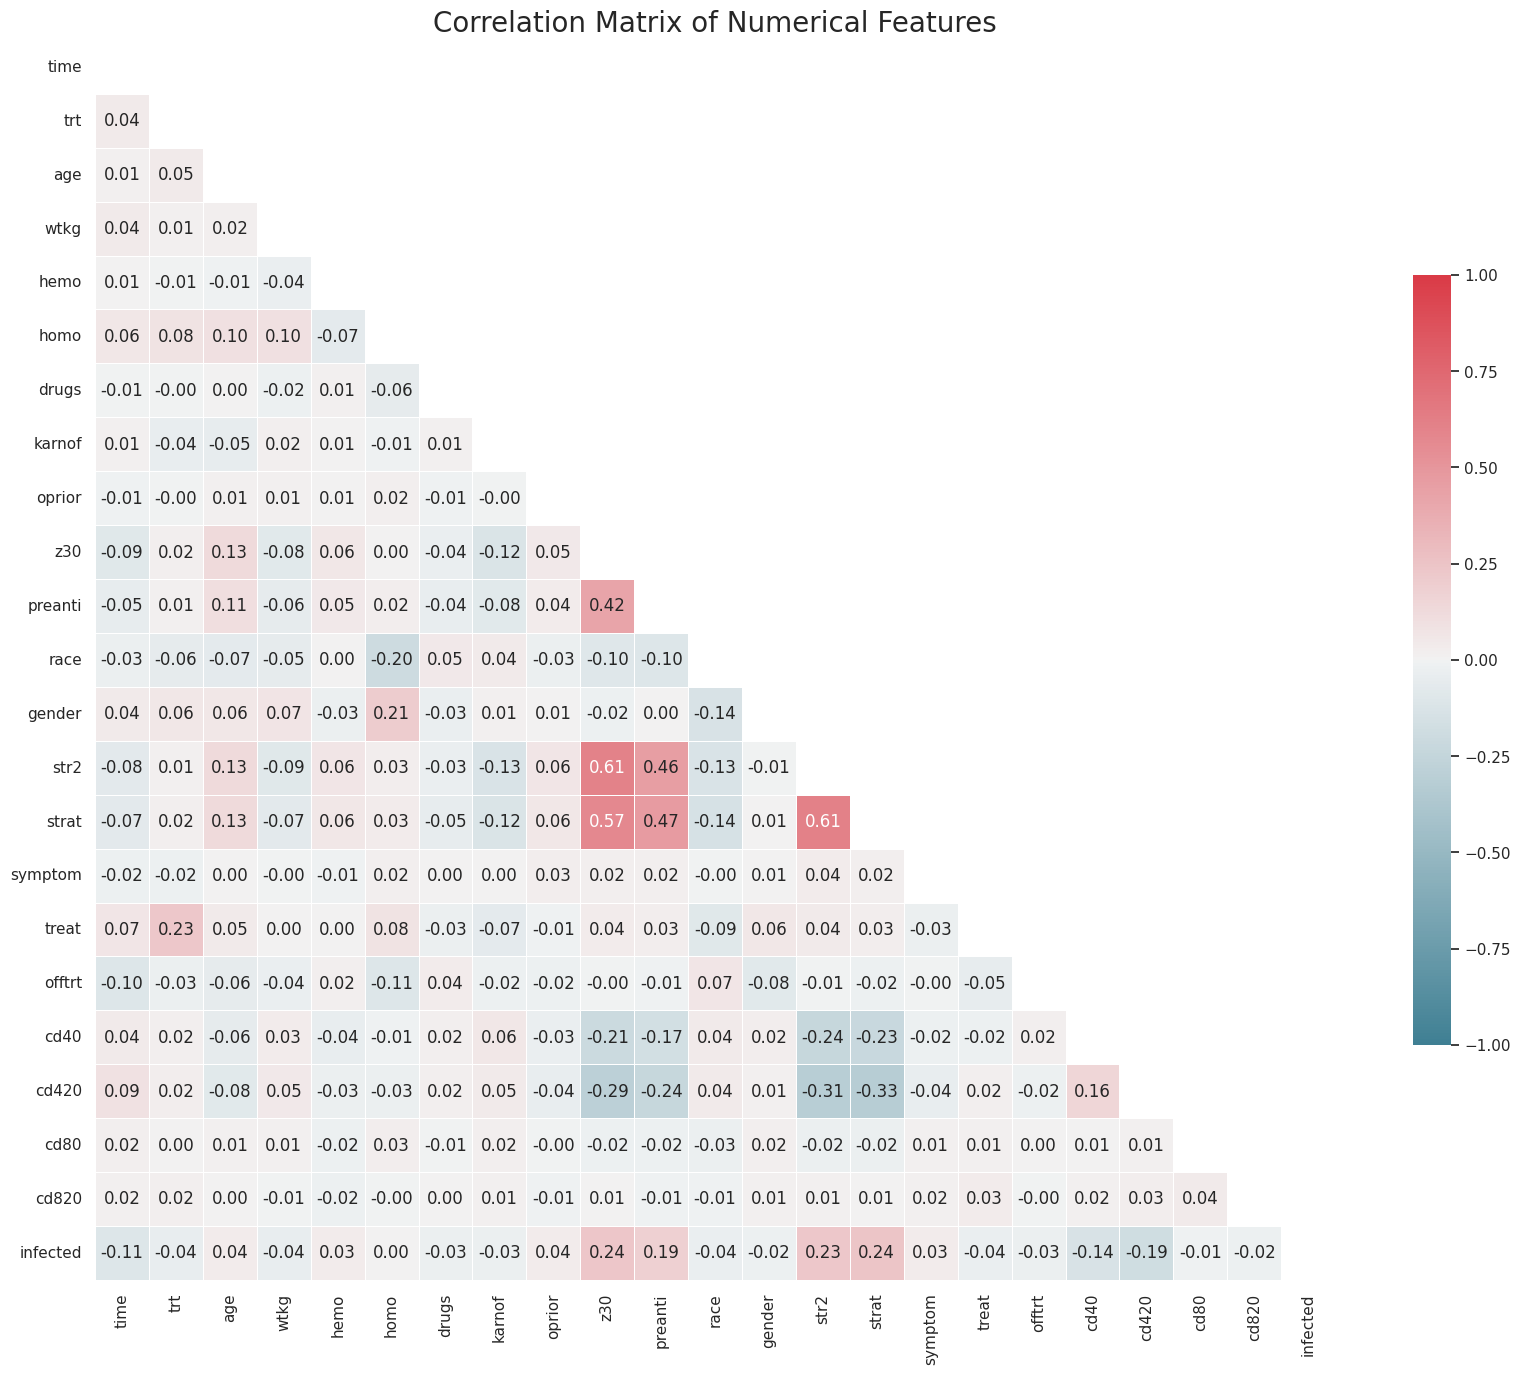

In [6]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Generate a mask for the upper triangle (since the matrix is symmetric)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.show()

In [7]:
# Display all column names in the dataset
print(data.columns)

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')


## Univariate Analysis

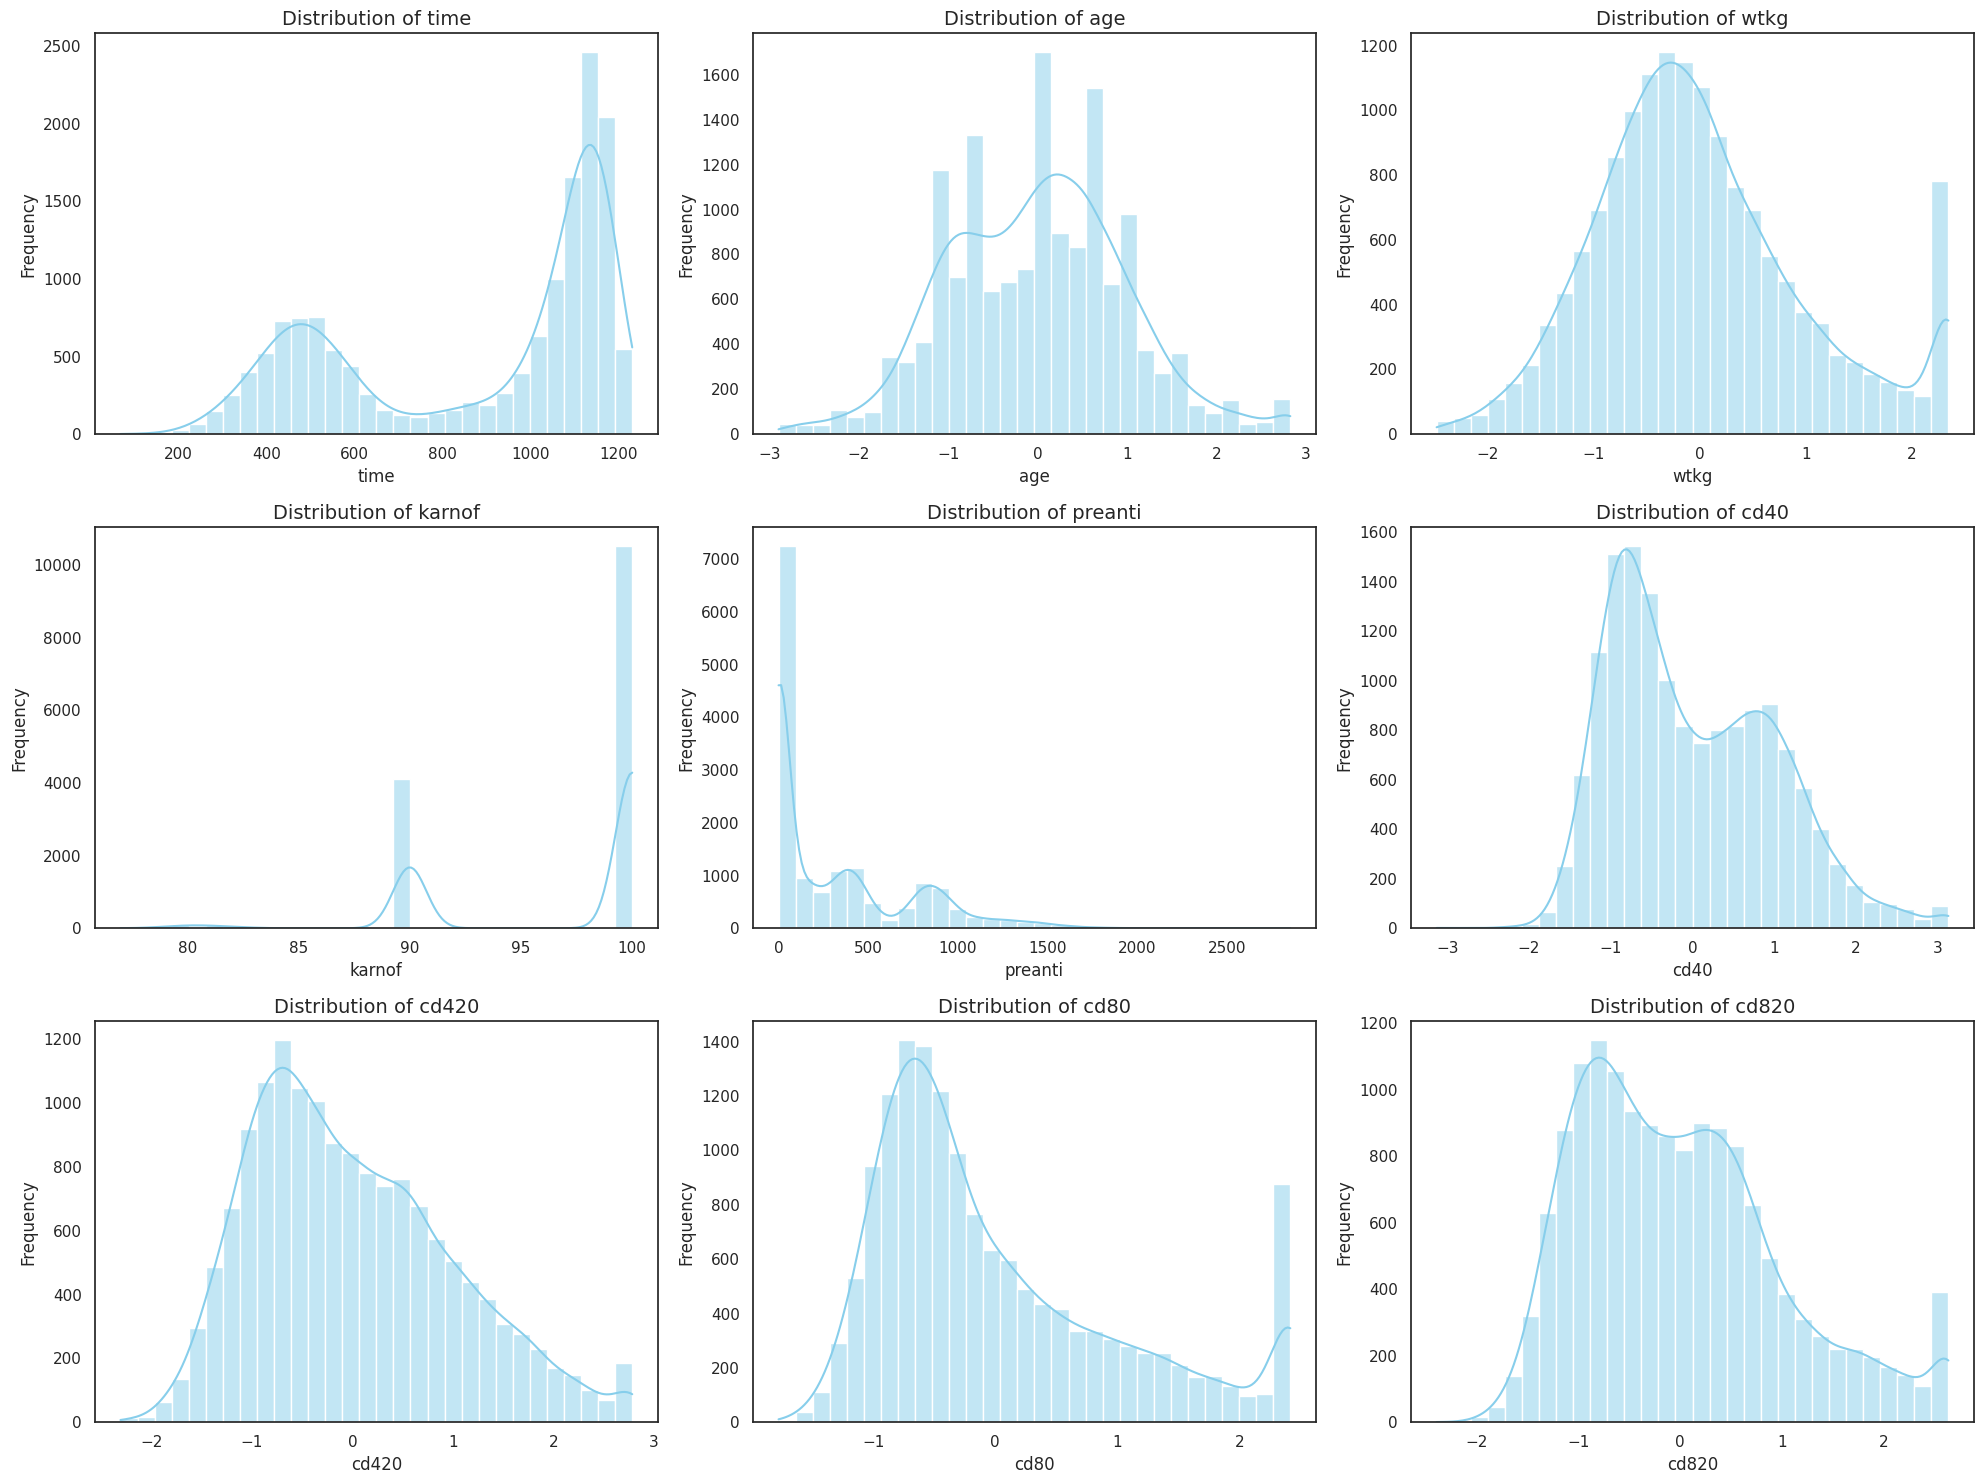

In [8]:
# Numerical Variables
numerical_columns = ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Iterate through the numerical columns and create a histogram with a density plot for each
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Adjust layout based on number of columns
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-9-5630dca2535a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set2')
<ipython-input-9-5630dca2535a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set2')
<ipython-input-9-5630dca2535a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set2')
<ipython-input-9-5630dca2535a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

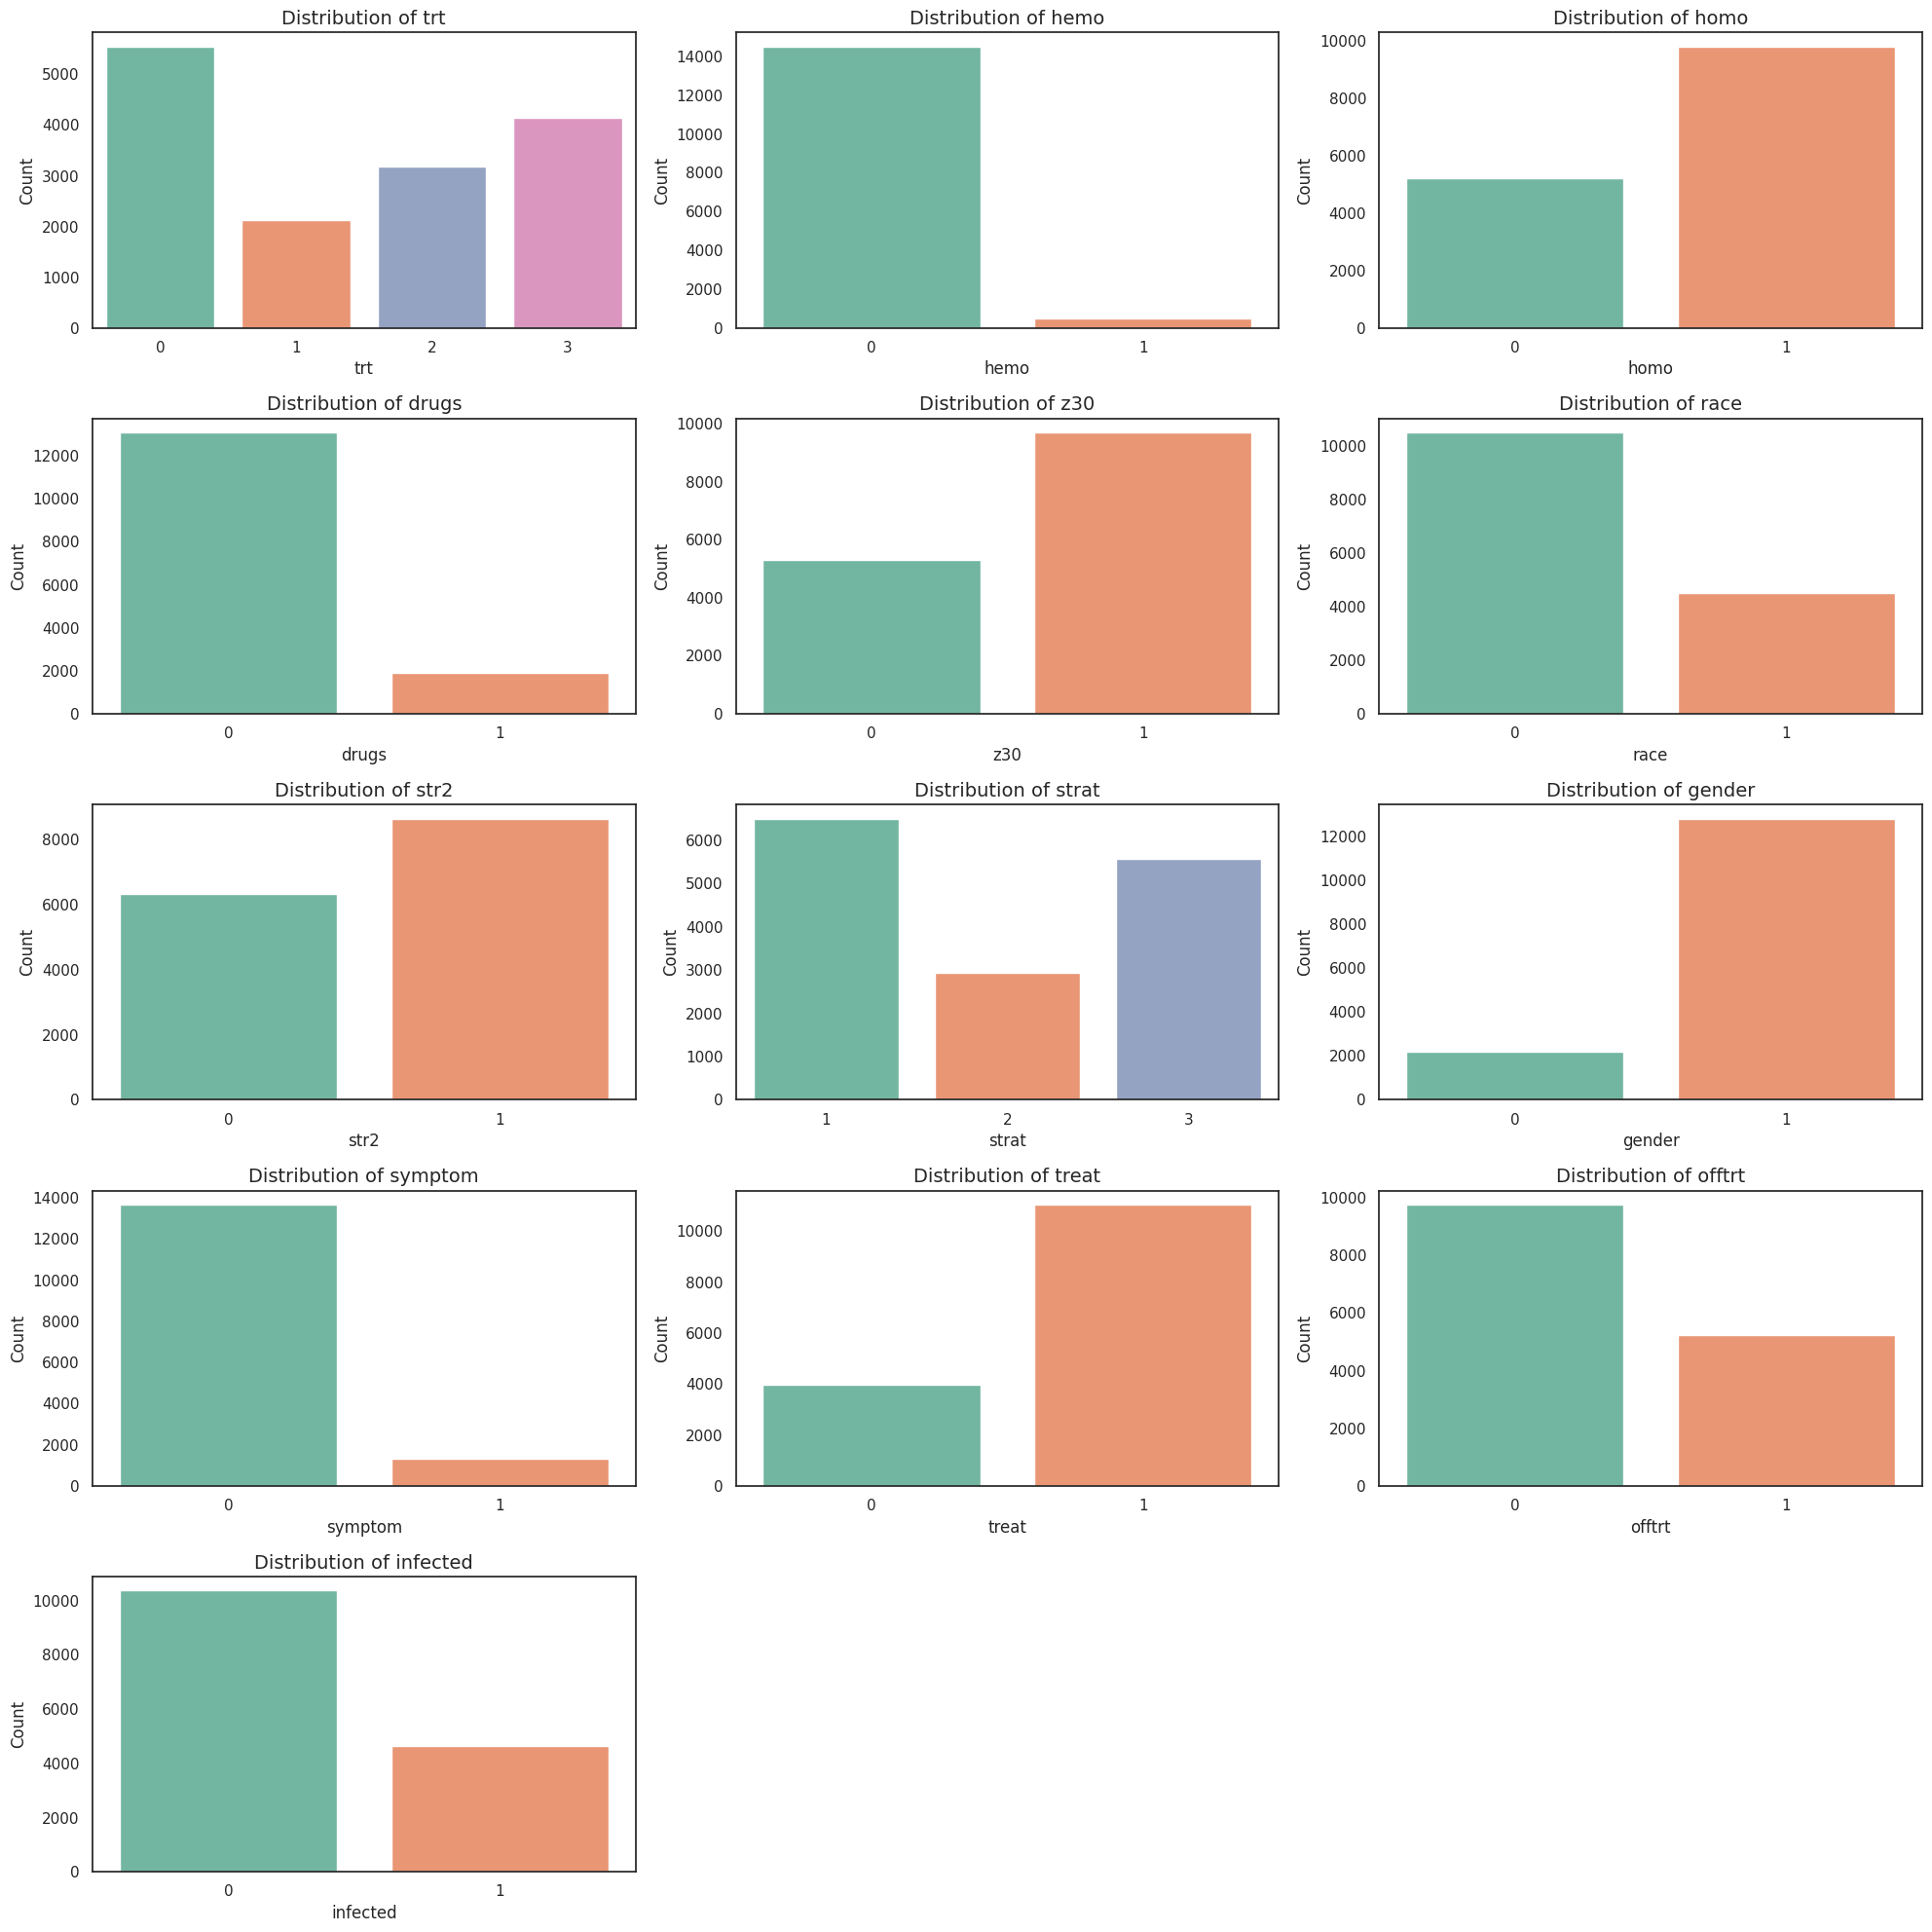

In [9]:
# Correct the list of categorical columns after checking the actual column names
categorical_columns = ['trt', 'hemo', 'homo', 'drugs', 'z30', 'race', 'str2', 'strat',
                       'gender', 'symptom', 'treat', 'offtrt', 'infected']

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Iterate through the categorical columns and create a bar plot for each
for i, column in enumerate(categorical_columns, 1):
    plt.subplot((len(categorical_columns) + 2) // 3, 3, i)  # Adjust layout based on number of columns
    sns.countplot(data=data, x=column, palette='Set2')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Bivariate Analysis

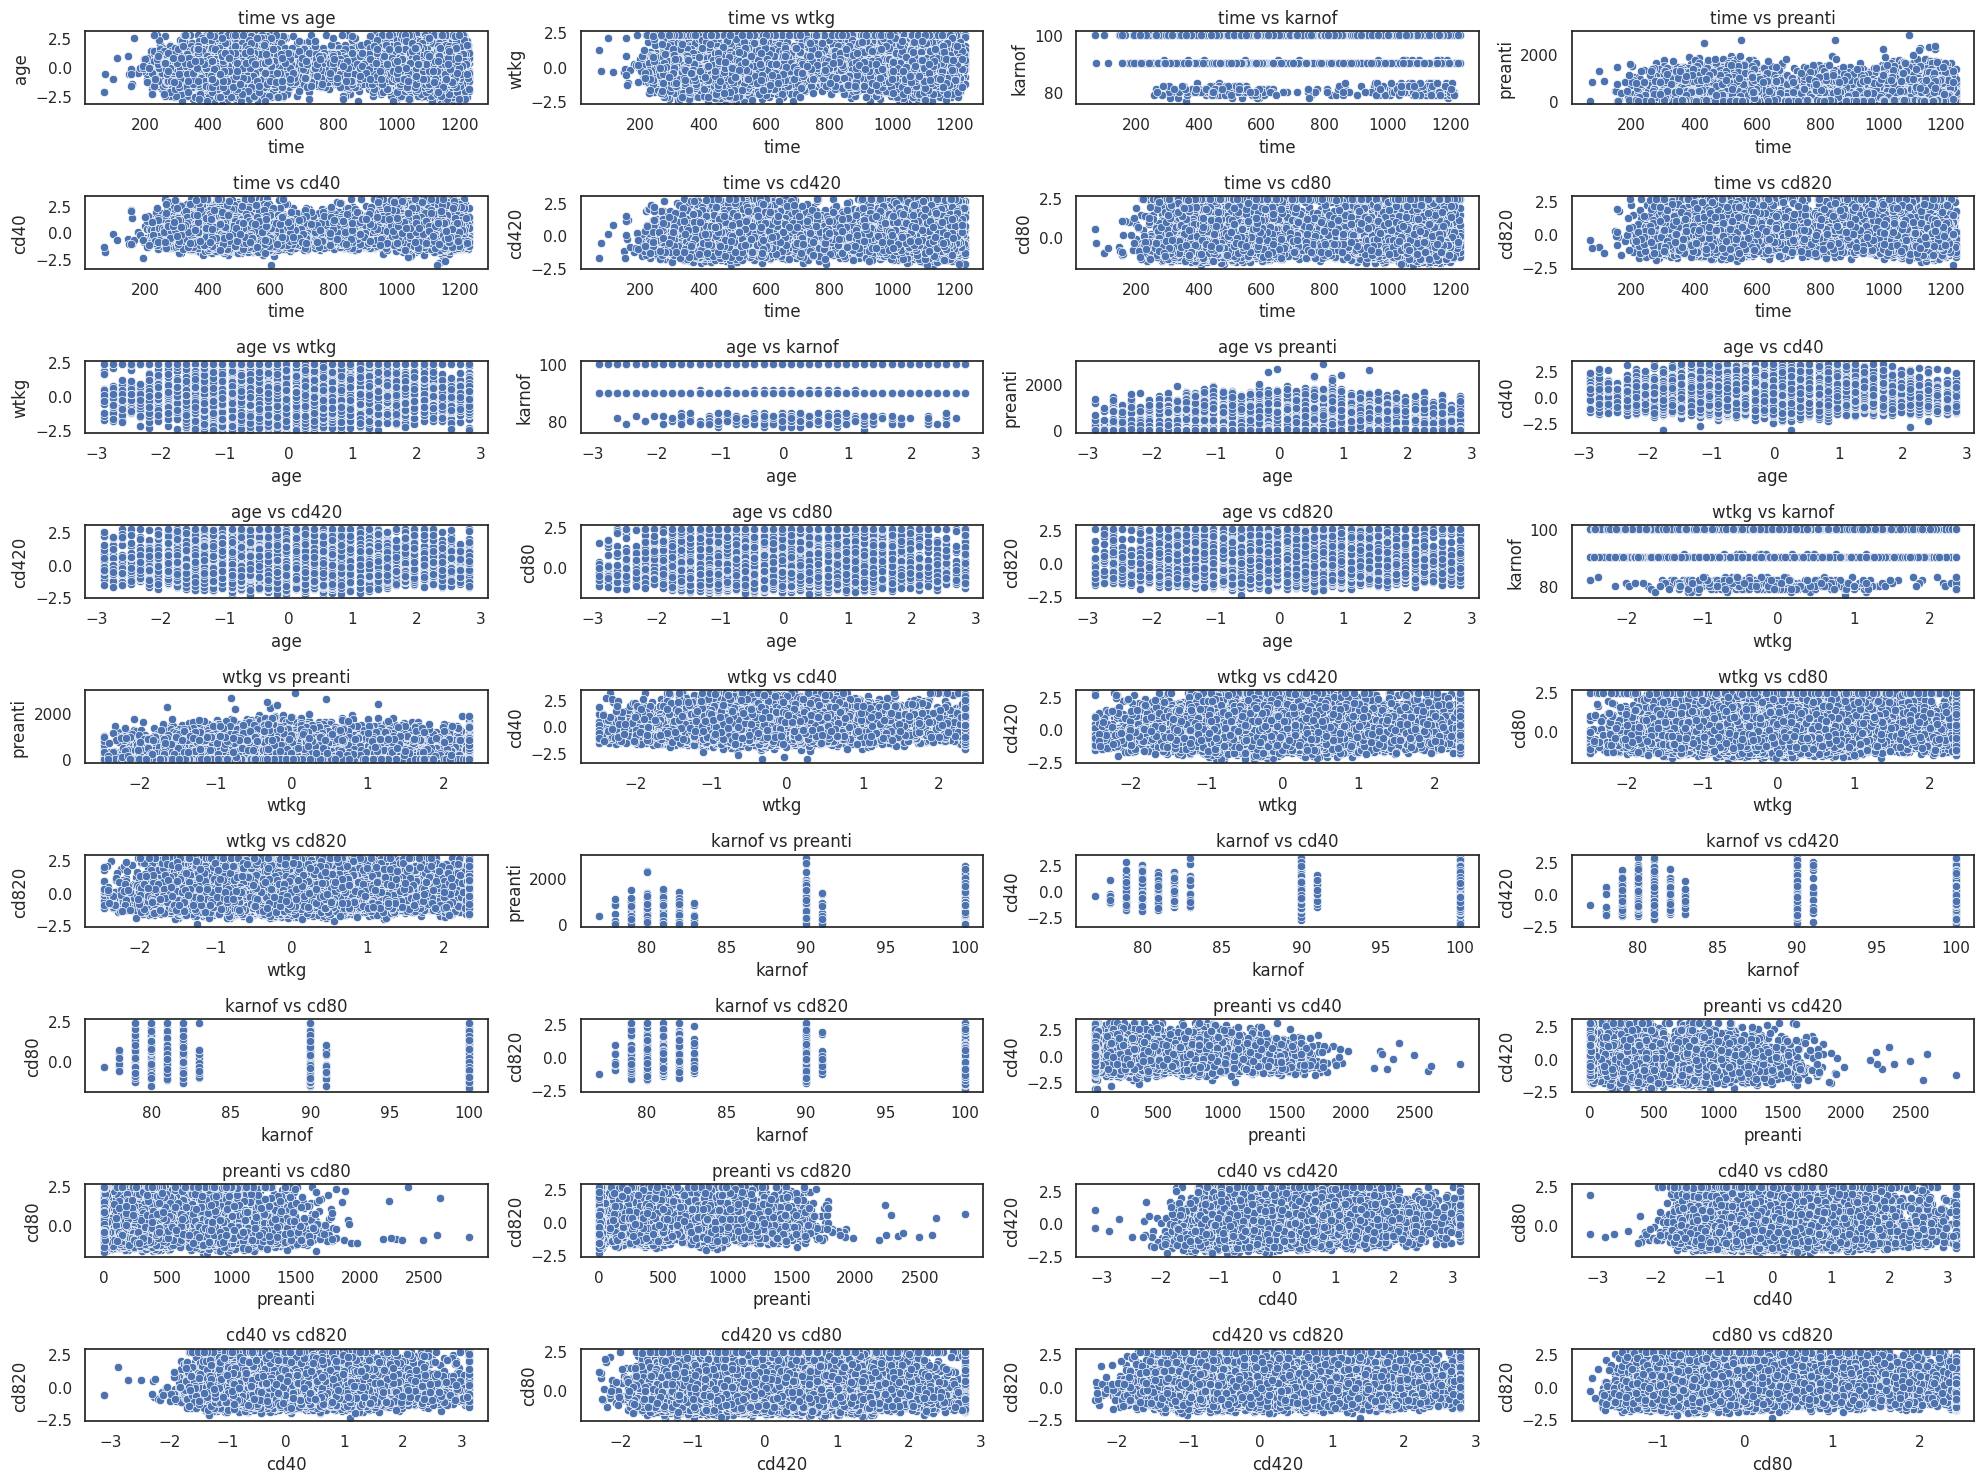

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns to consider
numerical_columns = ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

# Generate scatter plots for each pair of numerical variables
plt.figure(figsize=(20, 15))
plot_number = 1

for i, var1 in enumerate(numerical_columns):
    for j, var2 in enumerate(numerical_columns):
        if i < j:  # To avoid redundant plots
            plt.subplot(len(numerical_columns), len(numerical_columns)//2, plot_number)
            sns.scatterplot(x=data[var1], y=data[var2])
            plt.title(f'{var1} vs {var2}', fontsize=12)
            plot_number += 1

plt.tight_layout()
plt.show()

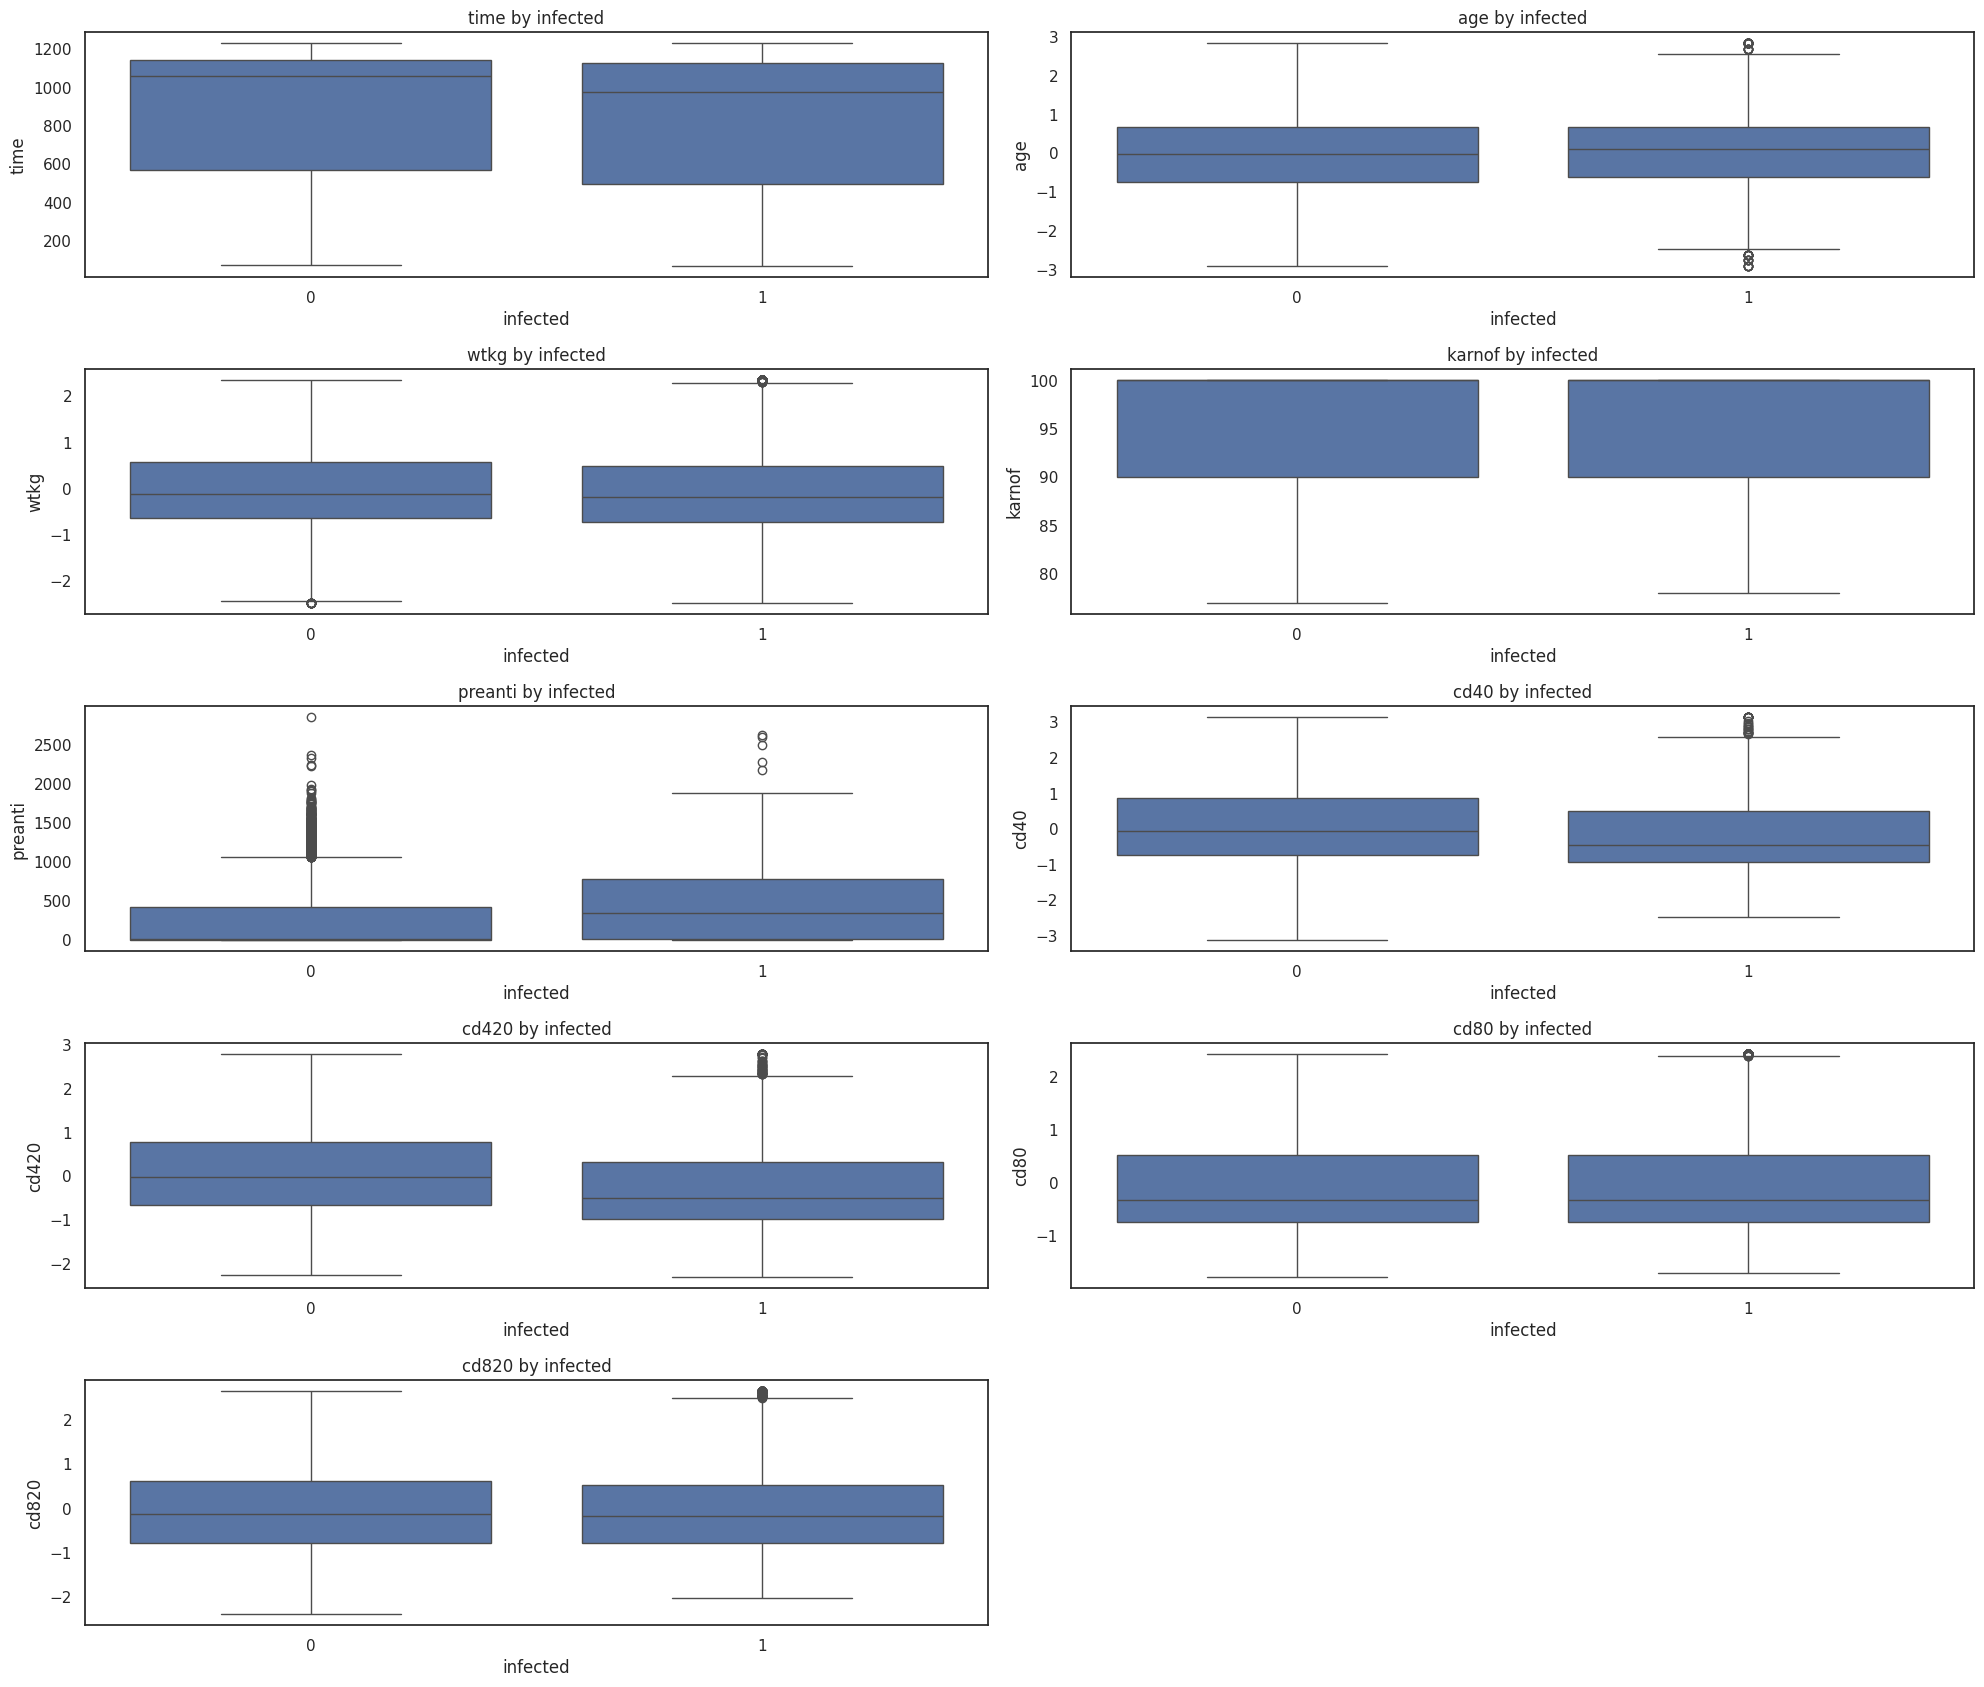

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns to consider
numerical_columns = ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

# The categorical column we are interested in
cat_col = 'infected'

# Set up the matplotlib figure
plt.figure(figsize=(20, 30))
plot_number = 1

# Generate box plots for each numerical variable against 'infected'
for num_col in numerical_columns:
    plt.subplot(len(numerical_columns), 2, plot_number)
    sns.boxplot(x=data[cat_col], y=data[num_col])
    plt.title(f'{num_col} by {cat_col}', fontsize=12)
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plot_number += 1

plt.tight_layout()
plt.show()


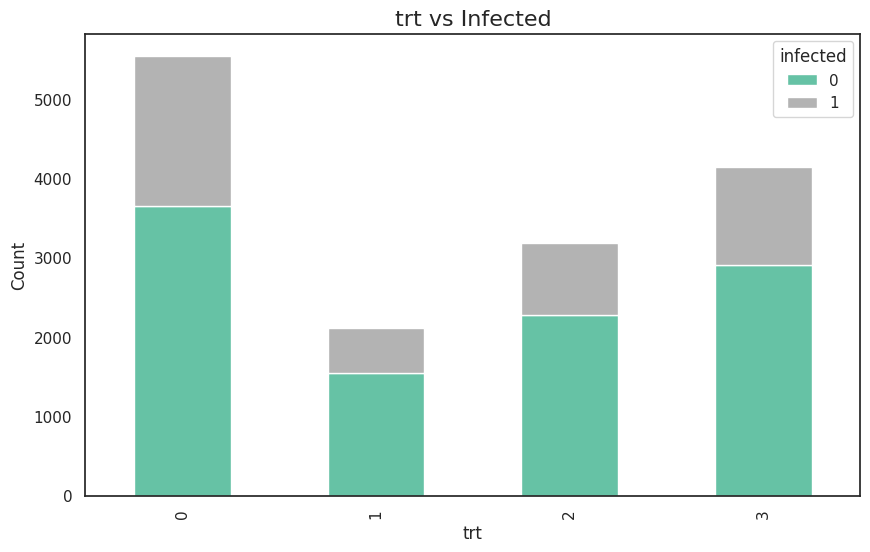

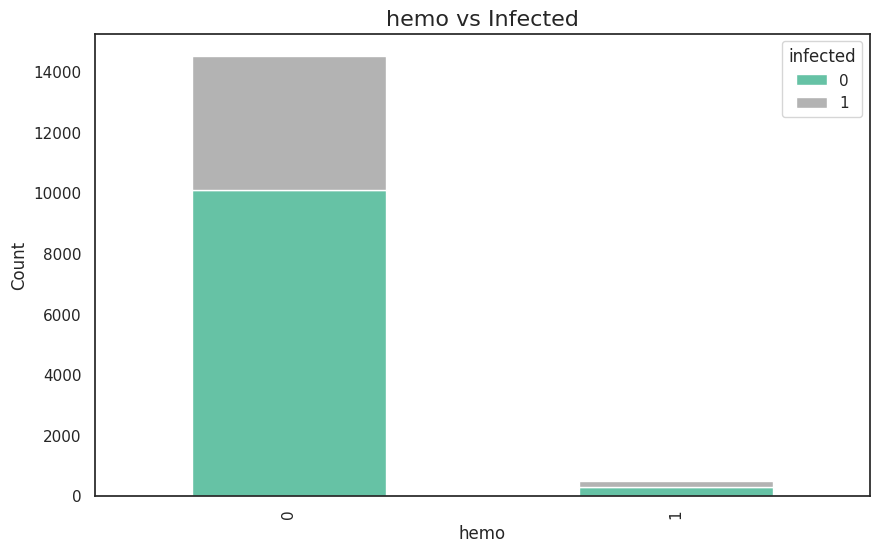

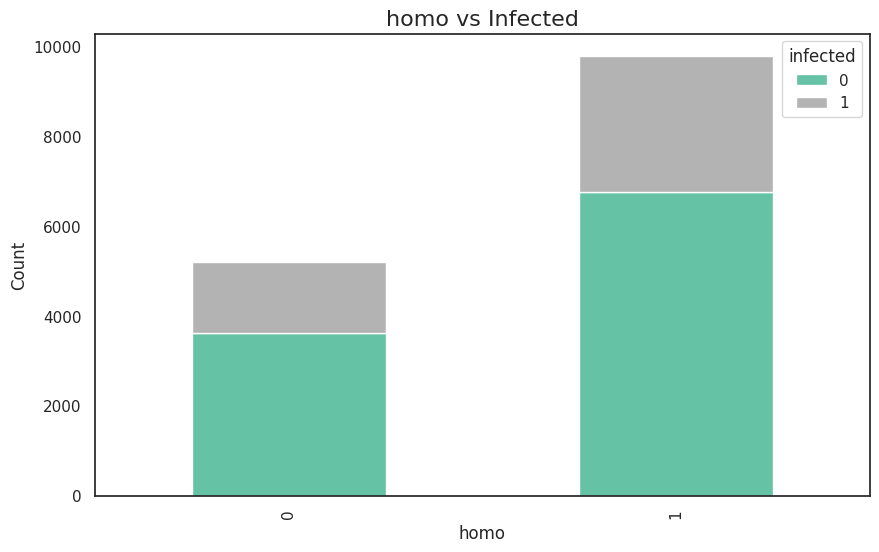

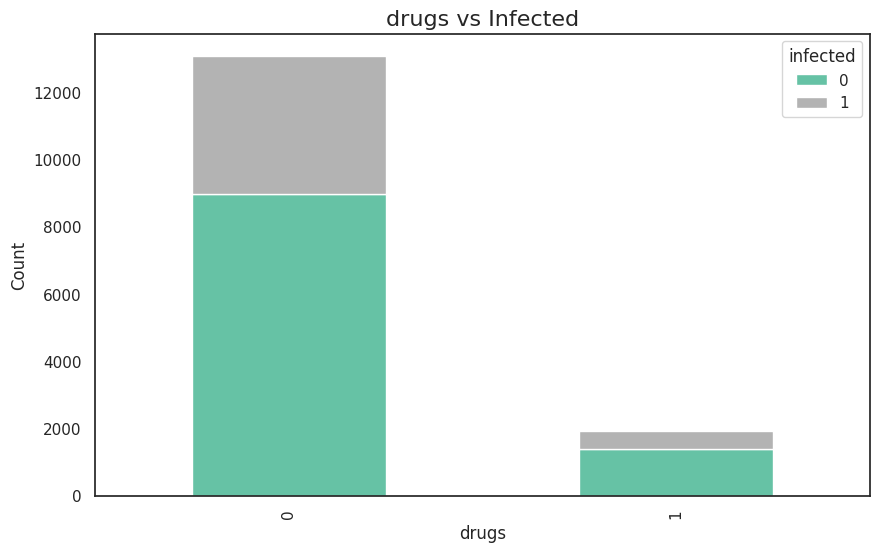

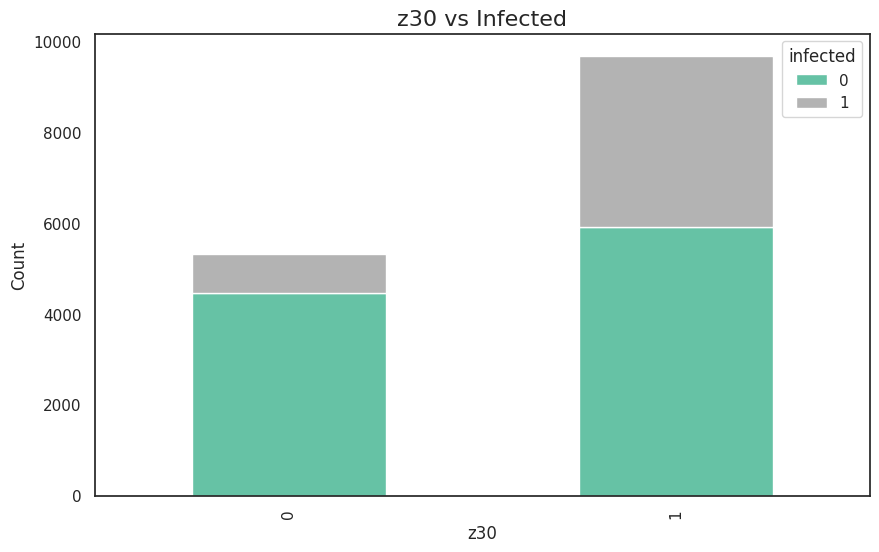

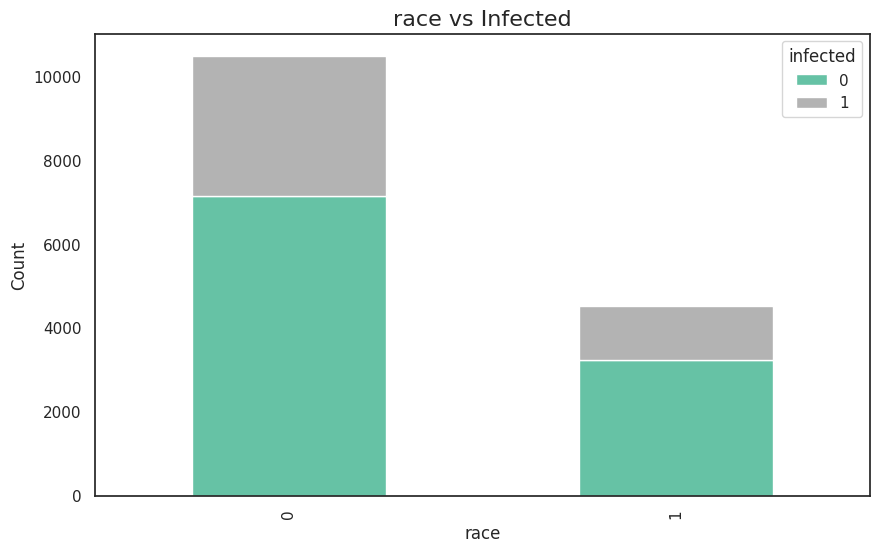

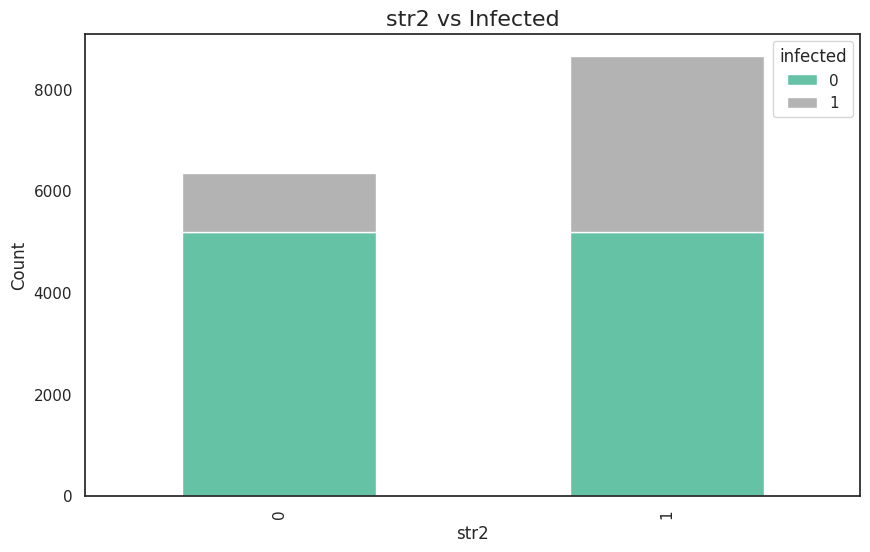

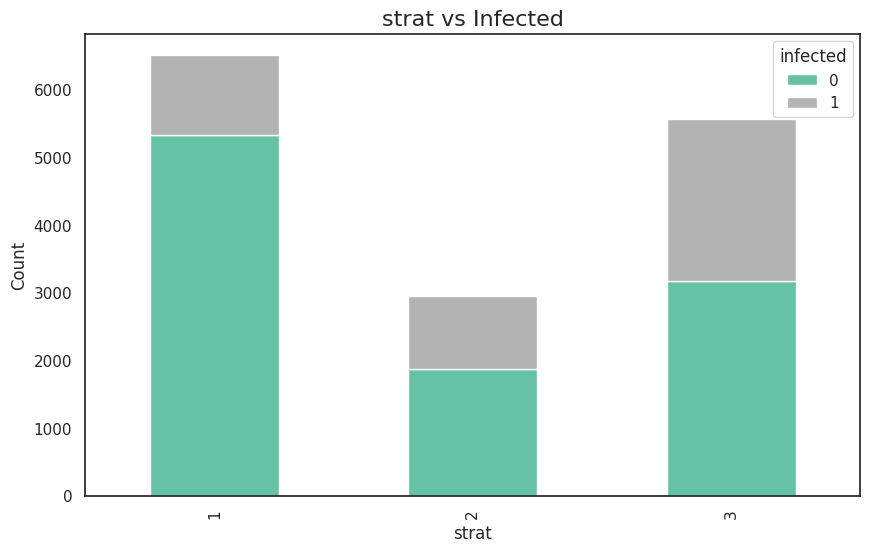

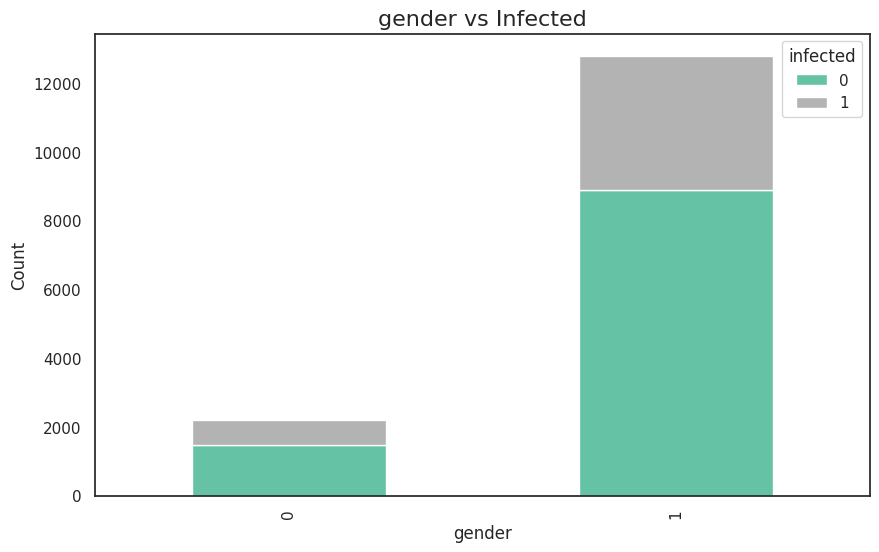

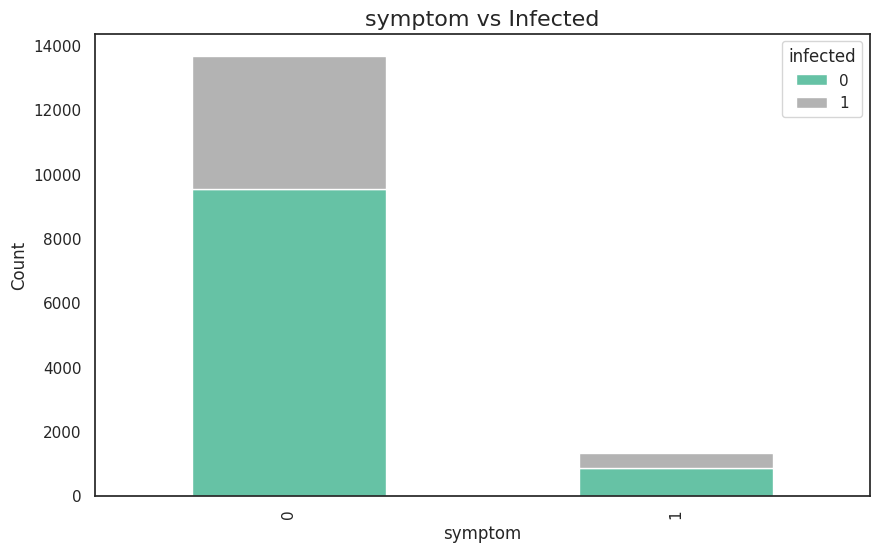

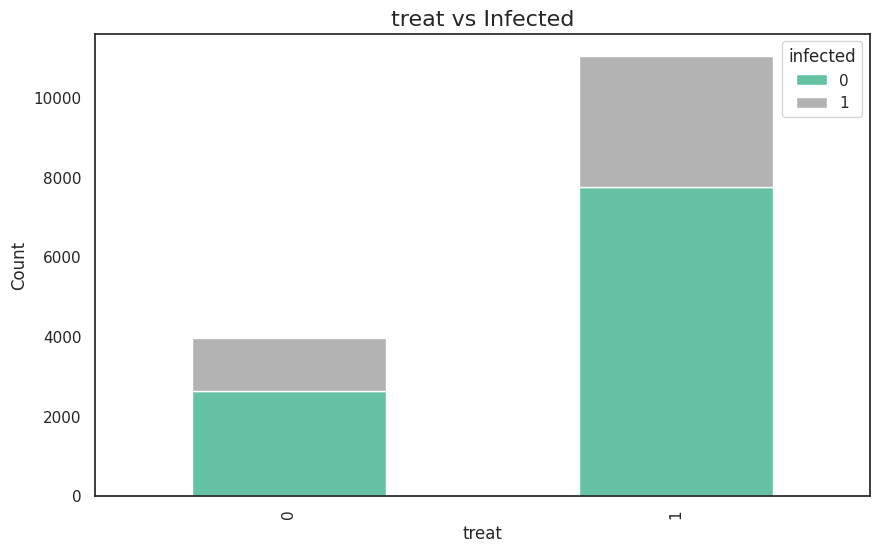

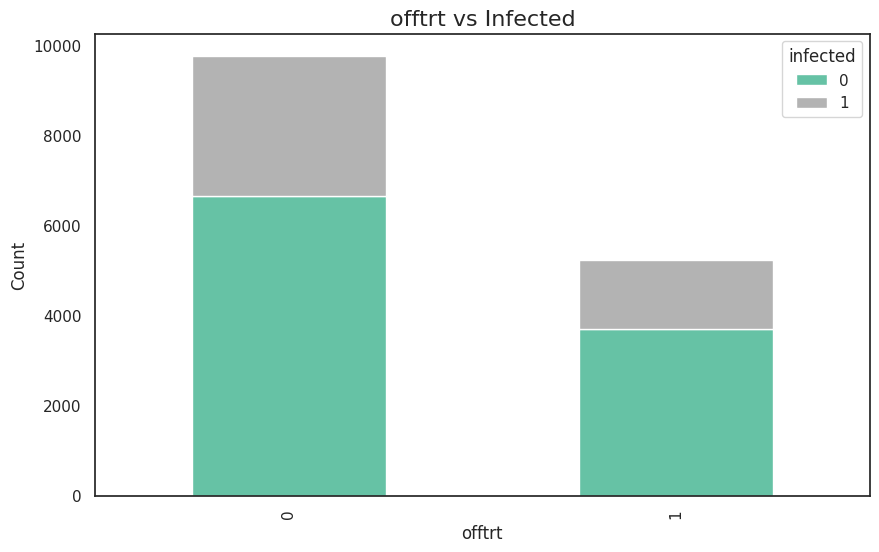

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Categorical columns to consider
categorical_columns = ['trt', 'hemo', 'homo', 'drugs', 'z30', 'race', 'str2', 'strat',
                       'gender', 'symptom', 'treat', 'offtrt']

# Generate stacked bar plots for each categorical variable against 'infected'
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))
    pd.crosstab(data[cat_col], data['infected']).plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
    plt.title(f'{cat_col} vs Infected', fontsize=16)
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.show()


<Figure size 1000x600 with 0 Axes>

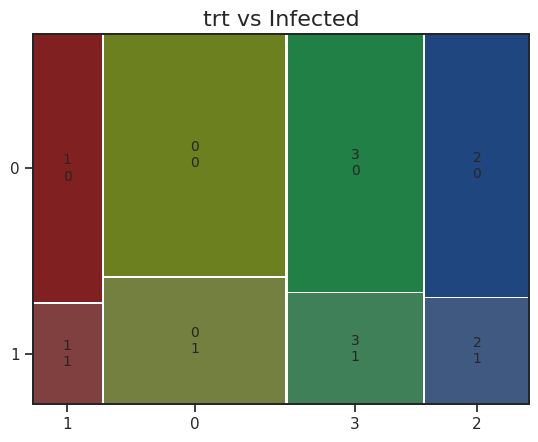

<Figure size 1000x600 with 0 Axes>

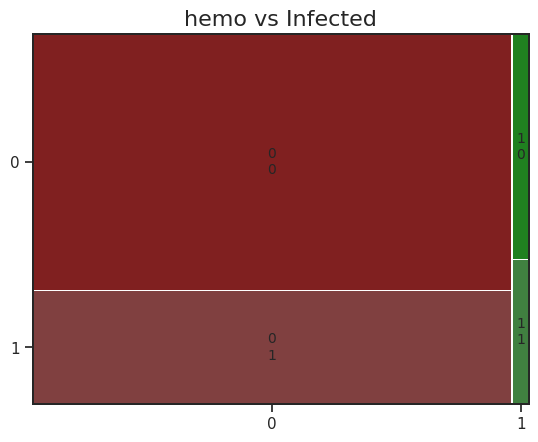

<Figure size 1000x600 with 0 Axes>

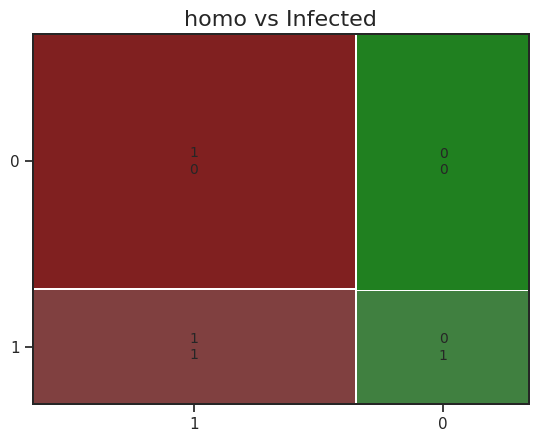

<Figure size 1000x600 with 0 Axes>

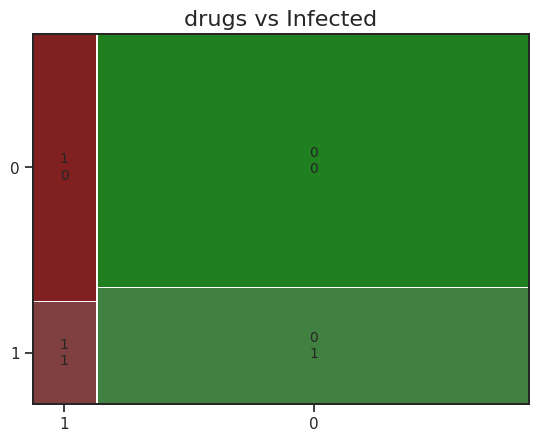

<Figure size 1000x600 with 0 Axes>

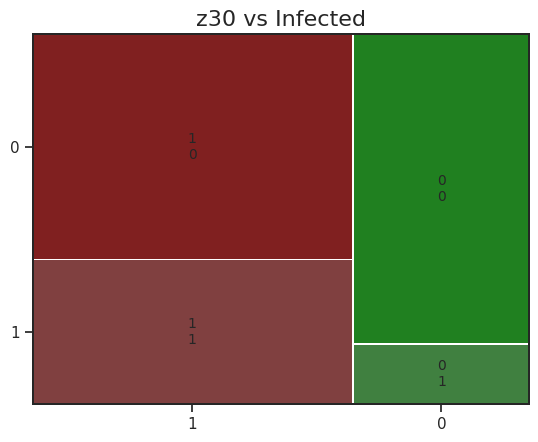

<Figure size 1000x600 with 0 Axes>

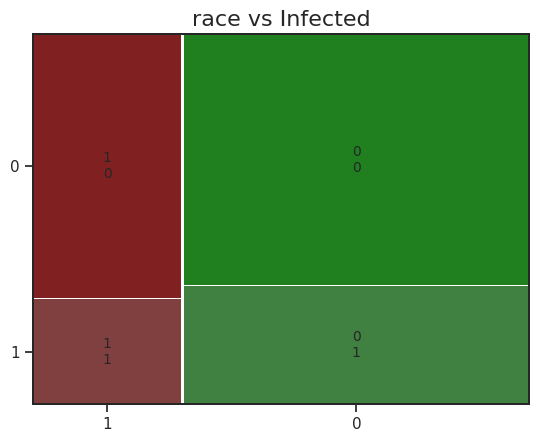

<Figure size 1000x600 with 0 Axes>

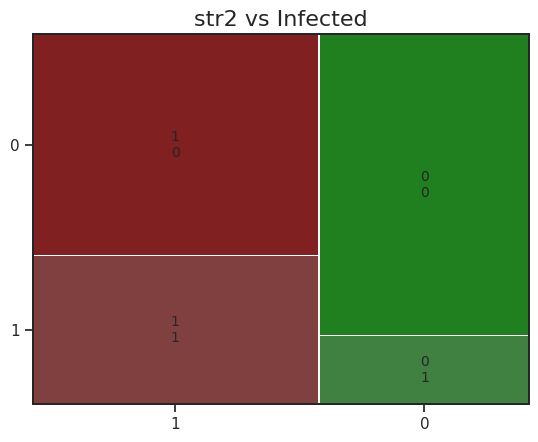

<Figure size 1000x600 with 0 Axes>

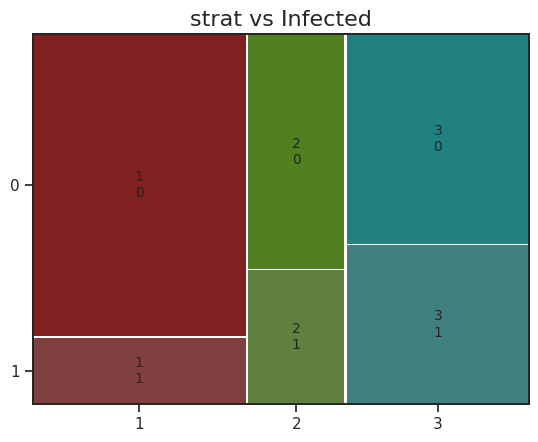

<Figure size 1000x600 with 0 Axes>

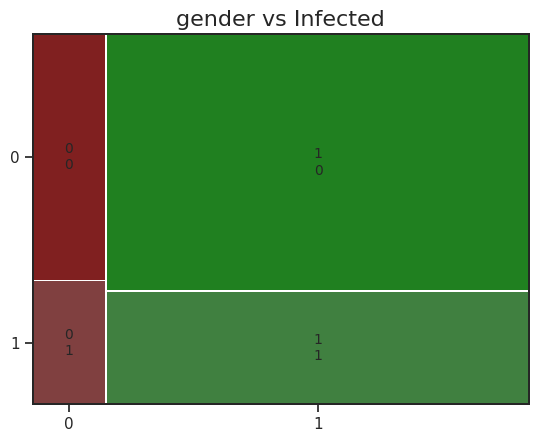

<Figure size 1000x600 with 0 Axes>

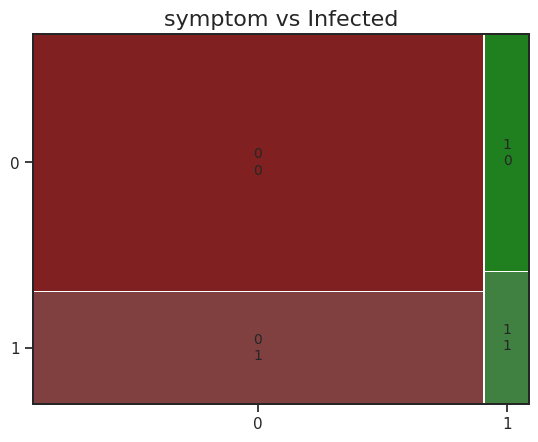

<Figure size 1000x600 with 0 Axes>

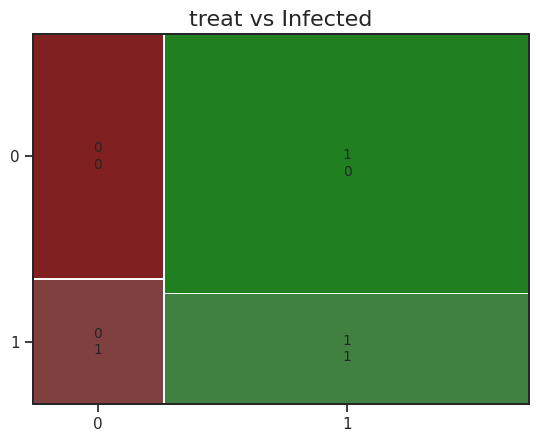

<Figure size 1000x600 with 0 Axes>

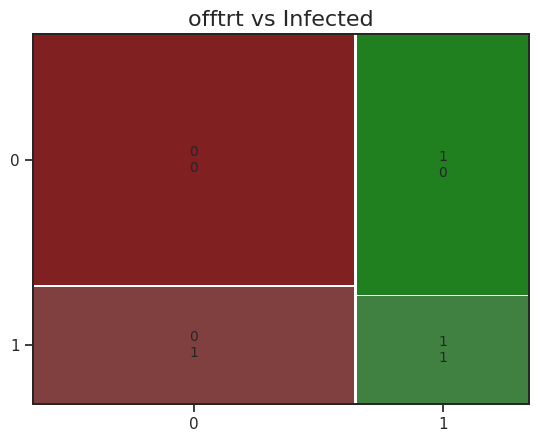

In [13]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Categorical columns to consider
categorical_columns = ['trt', 'hemo', 'homo', 'drugs', 'z30', 'race', 'str2', 'strat',
                       'gender', 'symptom', 'treat', 'offtrt']

# Generate mosaic plots for each categorical variable against 'infected'
for cat_col in categorical_columns:
    plt.figure(figsize=(10, 6))
    mosaic(data, [cat_col, 'infected'])
    plt.title(f'{cat_col} vs Infected', fontsize=16)
    plt.show()

### Survival Analysis Initial Exploration

In [14]:
pip install lifelines

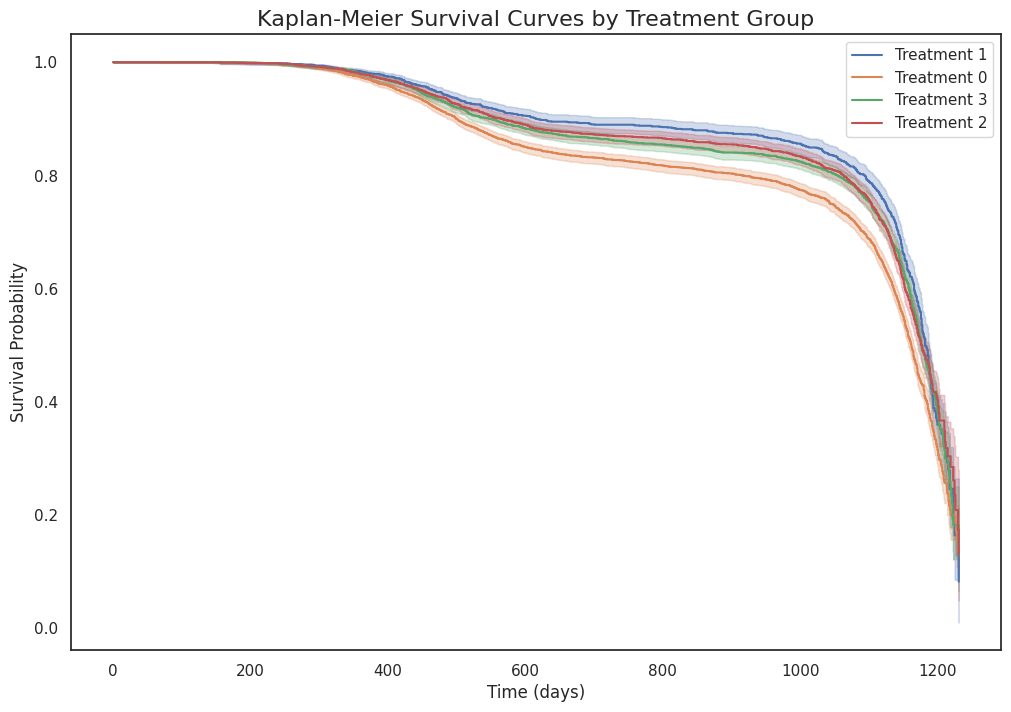

In [15]:
# Import necessary libraries for survival analysis
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Prepare the data
time_column = 'time'  # The column representing the survival time
event_column = 'infected'  # The column representing the event occurrence (e.g., infection status)
treatment_column = 'trt'  # The column representing different treatment groups

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Plot Kaplan-Meier curves for each treatment group
for treatment_group in data[treatment_column].unique():
    mask = data[treatment_column] == treatment_group
    kmf.fit(data[mask][time_column], event_observed=data[mask][event_column], label=f'Treatment {treatment_group}')
    kmf.plot_survival_function()

# Set plot labels and title
plt.title('Kaplan-Meier Survival Curves by Treatment Group', fontsize=16)
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()

## Feature Engineering

Selected Features using RFE:
Index(['hemo', 'oprior', 'z30', 'str2', 'strat', 'symptom', 'treat', 'offtrt',
       'cd40', 'cd420'],
      dtype='object')
Selected Features using Lasso Regression:
Index(['time', 'preanti', 'strat', 'cd40', 'cd420'], dtype='object')
Explained variance ratio by each principal component:
[0.13814099 0.07479698 0.05462381 0.04810988 0.0473772  0.0458701
 0.0454855  0.04482625 0.0442298  0.04364151 0.04299316 0.04214645
 0.04149501 0.04075896 0.03902911 0.0380896  0.03610114 0.03460887
 0.0337461  0.02787447]


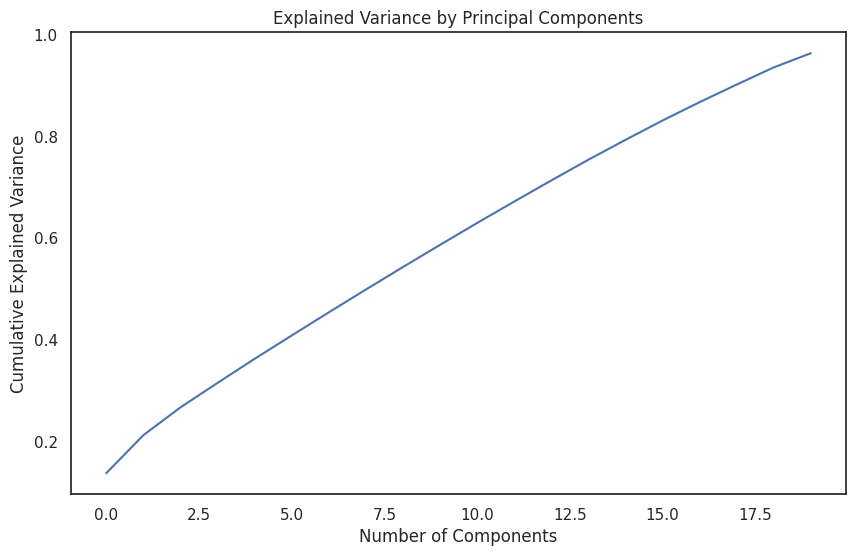

Polynomial features:
     time  trt       age      wtkg  hemo  homo  drugs  karnof  oprior  z30  \
0  1108.0  1.0  0.393706  1.166337   0.0   1.0    1.0   100.0     0.0  1.0   
1  1079.0  0.0  1.252369 -0.814378   0.0   0.0    0.0   100.0     0.0  1.0   
2   492.0  1.0 -0.035625  0.684089   0.0   0.0    0.0    90.0     0.0  1.0   
3  1191.0  1.0  0.966148  2.169046   0.0   0.0    0.0    81.0     0.0  1.0   
4  1141.0  3.0  1.824811 -2.035089   0.0   1.0    0.0   100.0     0.0  0.0   

   ...    cd40^2  cd40 cd420  cd40 cd80  cd40 cd820   cd420^2  cd420 cd80  \
0  ...  0.479742   -0.568755  -0.479020   -0.360930  0.674283    0.567899   
1  ...  0.000026    0.000128   0.001397   -0.005004  0.000631    0.006866   
2  ...  0.005403    0.046217  -0.063621   -0.015608  0.395322   -0.544191   
3  ...  0.000026    0.007397  -0.001235   -0.001282  2.092627   -0.349342   
4  ...  0.143304    0.265111   0.456658    0.266440  0.490452    0.844811   

   cd420 cd820    cd80^2  cd80 cd820   cd820^2 

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame and 'infected' is the target variable

# Define the feature matrix X and the target variable y
X = data.drop(columns=['infected'])  # Drop the target column from features
y = data['infected']  # Target variable

# --------------------
# 2.1. Feature Selection
# --------------------

# 2.1.1. Recursive Feature Elimination (RFE) with Logistic Regression
logreg = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=logreg, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]

print("Selected Features using RFE:")
print(selected_features_rfe)

# 2.1.2. Lasso Regression for Feature Selection
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X, y)
selected_features_lasso = X.columns[(lasso.coef_ != 0)]

print("Selected Features using Lasso Regression:")
print(selected_features_lasso)

# 2.1.3. Dimensionality Reduction using PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

print("Explained variance ratio by each principal component:")
print(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# --------------------
# 2.2. Interaction and Non-Linear Features
# --------------------

# 2.2.1. Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

print("Polynomial features:")
print(X_poly_df.head())

# 2.2.2. Interaction Features (manual examples)
# Example: Create interaction feature between 'age' and 'wtkg'
data['age_wtkg_interaction'] = data['age'] * data['wtkg']

# Example: Create interaction feature between 'cd40' and 'cd420'
data['cd40_cd420_interaction'] = data['cd40'] * data['cd420']

print("Data with interaction features:")
print(data[['age_wtkg_interaction', 'cd40_cd420_interaction']].head())

In [17]:
import pandas as pd
import itertools

# Relevant numerical columns
numerical_columns = ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

# Create interaction features
for col1, col2 in itertools.combinations(numerical_columns, 2):
    interaction_feature_name = f'{col1}_{col2}_interaction'
    data[interaction_feature_name] = data[col1] * data[col2]

# Display the first few rows of the newly created interaction features
interaction_feature_columns = [f'{col1}_{col2}_interaction' for col1, col2 in itertools.combinations(numerical_columns, 2)]
print("Data with interaction features:")
print(data[interaction_feature_columns].head())

Data with interaction features:
   time_age_interaction  time_wtkg_interaction  time_karnof_interaction  \
0            436.226650            1292.301770                   110800   
1           1351.306157            -878.713915                   107900   
2            -17.527480             336.571871                    44280   
3           1150.682416            2583.333681                    96471   
4           2082.109086           -2322.036481                   114100   

   time_preanti_interaction  time_cd40_interaction  time_cd420_interaction  \
0                    187252             767.438610             -909.831104   
1                    705666              -5.517154              -27.112274   
2                    349320              36.165054              309.343196   
3                   1181472              -6.089834            -1722.890449   
4                         0            -431.931764             -799.068251   

   time_cd80_interaction  time_cd820_interaction

## Survival Analysis Modeling

### 3.1.1. Cox Proportional Hazards Model

In [18]:
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

# Define the dataset for survival analysis
# Ensure the 'time' and 'event' (infected) columns are correctly defined
survival_data = data[['time', 'infected'] + selected_features_rfe.tolist()]

# Initialize the Cox Proportional Hazards model
cox_model = CoxPHFitter()

# Fit the model to the data
cox_model.fit(survival_data, duration_col='time', event_col='infected')

# Print the summary of the model
cox_model.print_summary()

# Check the proportional hazards assumption using Schoenfeld residuals
results = proportional_hazard_test(cox_model, survival_data, time_transform='rank')
print(results)

<lifelines.CoxPHFitter: fitted with 15000 total observations, 10369 right-censored observations>
             duration col = 'time'
                event col = 'infected'
      baseline estimation = breslow
   number of observations = 15000
number of events observed = 4631
   partial log-likelihood = -39809.36
         time fit was run = 2024-08-12 12:07:30 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
hemo       -0.06       0.95       0.07            -0.20             0.09                 0.82                 1.10
oprior      0.09       1.10       0.07            -0.04             0.22                 0.96                 1.25
z30         0.50       1.65       0.05             0.40             0.59                 1.50                 1.81
str2        0.25       1.29       0.05             0.16             0.34                 1.18                 1.41
strat       0.11       1.12       0.02             0.07             0.15                 1.07                 1.17
symptom     0.11       1.12       0.05             0.02             0.21                 1.02                 1.23
treat      -0.31       0.73       0.03            -0.38            -0.25                 0.68                 0.78
offtrt      0.13       1.14       0.03             0.07             0.19                 1.07                 1.21
cd40       -0.12       0.89       0.02            -0.15            -0.08                 0.86                 0.92
cd420      -0.20       0.82       0.02            -0.24            -0.17                 0.79                 0.85

            cmp to      z      p   -log2(p)
covariate                                  
hemo          0.00  -0.74   0.46       1.12
oprior        0.00   1.39   0.16       2.61
z30           0.00  10.18 <0.005      78.45
str2          0.00   5.56 <0.005      25.13
strat         0.00   5.03 <0.005      20.95
symptom       0.00   2.30   0.02       5.56
treat         0.00  -9.62 <0.005      70.33
offtrt        0.00   4.03 <0.005      14.16
cd40          0.00  -7.12 <0.005      39.74
cd420         0.00 -11.61 <0.005     101.03
---
Concordance = 0.65
Partial AIC = 79638.73
log-likelihood ratio test = 1288.98 on 10 df
-log2(p) of ll-ratio test = 897.05

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 15000 total observations, 10369 right-censored observations>
         test_name = proportional_hazard_test

---
         test_statistic    p  -log2(p)
cd40               0.06 0.81      0.31
cd420              4.01 0.05      4.47
hemo               0.06 0.81      0.31
offtrt             3.65 0.06      4.15
oprior             1.98 0.16      2.65
str2               0.06 0.81      0.30
strat              0.01 0.91      0.14
symptom            0.48 0.49      1.03
treat              0.03 0.85      0.23
z30                0.28 0.60      0.74


### 3.1.2. Kaplan-Meier Survival Analysis

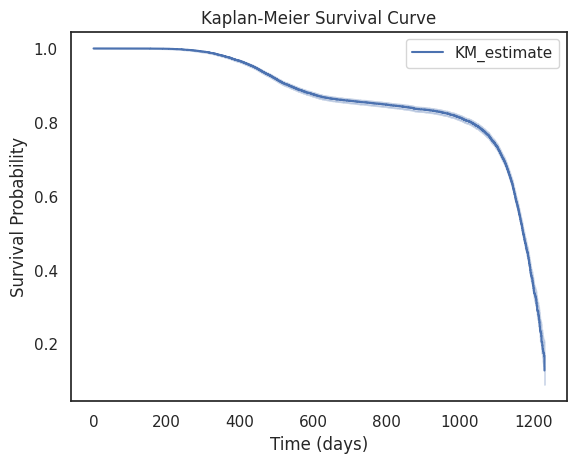

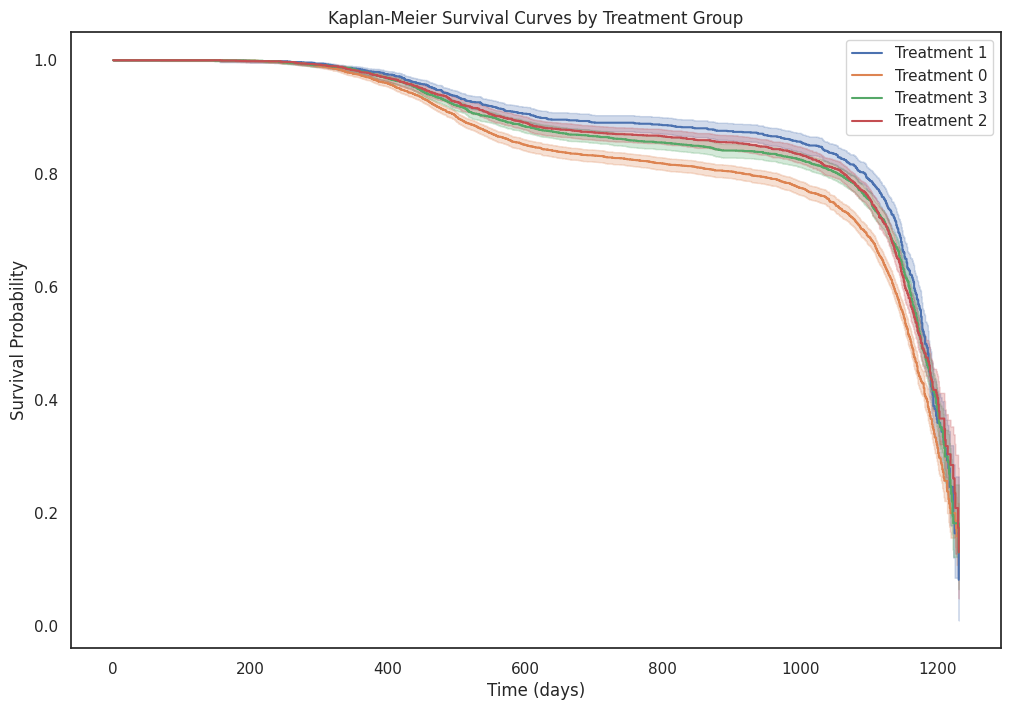

In [19]:
from lifelines import KaplanMeierFitter

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator for the entire dataset
kmf.fit(durations=survival_data['time'], event_observed=survival_data['infected'])

# Plot the survival function
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()

# Plot Kaplan-Meier curves for different treatment groups
plt.figure(figsize=(12, 8))
for treatment_group in data['trt'].unique():
    mask = data['trt'] == treatment_group
    kmf.fit(durations=data[mask]['time'], event_observed=data[mask]['infected'], label=f'Treatment {treatment_group}')
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Treatment Group')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()

### 3.1.3. Accelerated Failure Time (AFT) Model

In [20]:
from lifelines import WeibullAFTFitter

# Initialize the AFT model (Weibull distribution is commonly used)
aft_model = WeibullAFTFitter()

# Fit the AFT model to the data
aft_model.fit(survival_data, duration_col='time', event_col='infected')

# Print the summary of the model
aft_model.print_summary()

<lifelines.WeibullAFTFitter: fitted with 15000 total observations, 10369 right-censored observations>
             duration col = 'time'
                event col = 'infected'
   number of observations = 15000
number of events observed = 4631
           log-likelihood = -38463.19
         time fit was run = 2024-08-12 12:07:36 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ cd40        0.04       1.04       0.01             0.03             0.05                 1.03                 1.05
        cd420       0.07       1.07       0.01             0.06             0.08                 1.06                 1.08
        hemo        0.00       1.00       0.03            -0.05             0.05                 0.95                 1.05
        offtrt     -0.02       0.98       0.01            -0.05            -0.00                 0.96                 1.00
        oprior     -0.03       0.97       0.02            -0.08             0.01                 0.92                 1.01
        str2       -0.09       0.91       0.02            -0.12            -0.06                 0.89                 0.94
        strat      -0.05       0.95       0.01            -0.07            -0.04                 0.93                 0.96
        symptom    -0.04       0.96       0.02            -0.08            -0.01                 0.93                 0.99
        treat       0.09       1.09       0.01             0.07             0.11                 1.07                 1.12
        z30        -0.17       0.84       0.02            -0.20            -0.14                 0.82                 0.87
        Intercept   7.53    1865.70       0.02             7.49             7.57              1796.73              1937.31
rho_    Intercept   1.06       2.90       0.01             1.04             1.09                 2.82                 2.97

                    cmp to      z      p   -log2(p)
param   covariate                                  
lambda_ cd40          0.00   7.25 <0.005      41.13
        cd420         0.00  11.21 <0.005      94.45
        hemo          0.00   0.09   0.93       0.11
        offtrt        0.00  -2.23   0.03       5.28
        oprior        0.00  -1.46   0.15       2.78
        str2          0.00  -5.79 <0.005      27.11
        strat         0.00  -7.09 <0.005      39.41
        symptom       0.00  -2.59   0.01       6.71
        treat         0.00   7.94 <0.005      48.87
        z30           0.00 -10.04 <0.005      76.36
        Intercept     0.00 391.88 <0.005        inf
rho_    Intercept     0.00  83.01 <0.005        inf
---
Concordance = 0.65
AIC = 76950.38
log-likelihood ratio test = 1375.49 on 10 df
-log2(p) of ll-ratio test = 959.08


## 3.2. Machine Learning Models

In [21]:
!pip install scikit-survival xgboost pycox torchtuples

  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [25]:
!pip uninstall scikit-learn -y
!pip uninstall scikit-survival -y

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Found existing installation: scikit-survival 0.23.0
Uninstalling scikit-survival-0.23.0:
  Successfully uninstalled scikit-survival-0.23.0


In [26]:
!pip install scikit-learn==1.0.2
!pip install scikit-survival==0.17.1

  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


  Using cached scikit-survival-0.17.1.tar.gz (2.5 MB)
ERROR: Operation cancelled by user
  Installing build dependencies ... canceled

In [1]:
!pip install xgboost pycox torchtuples

In [2]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
import matplotlib.pyplot as plt
import numpy as np

# Prepare the dataset
X = survival_data.drop(columns=['time', 'infected'])  # Features
y = np.array([(bool(event), time) for event, time in zip(survival_data['infected'], survival_data['time'])],
             dtype=[('event', '?'), ('time', '<f8')])

# Train the Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10, random_state=42)
rsf.fit(X, y)

# Predict survival function for a single instance
instance_idx = 0
pred_surv = rsf.predict_survival_function(X.iloc[instance_idx])

# Plot survival function for the instance
plt.step(pred_surv[0].x, pred_surv[0].y, where="post")
plt.xlabel("Time (days)")
plt.ylabel("Survival probability")
plt.title("Survival Function for an Instance (Random Survival Forest)")
plt.show()

ModuleNotFoundError: No module named 'sksurv'